## Data Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("car_purchasing.csv", encoding = "latin(1)")
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [9]:
data.shape

(500, 9)

In [10]:
data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [12]:
missing_counts = data.isnull().sum()

In [14]:
missing_cols = missing_counts[missing_counts > 0]
print(missing_cols)

Series([], dtype: int64)


In [15]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [20]:
data[['age', 'annual Salary', 'credit card debt', 'net worth','car purchase amount']].corr()["car purchase amount"].sort_values(ascending = False)

car purchase amount    1.000000
age                    0.632865
annual Salary          0.617862
net worth              0.488580
credit card debt       0.028882
Name: car purchase amount, dtype: float64

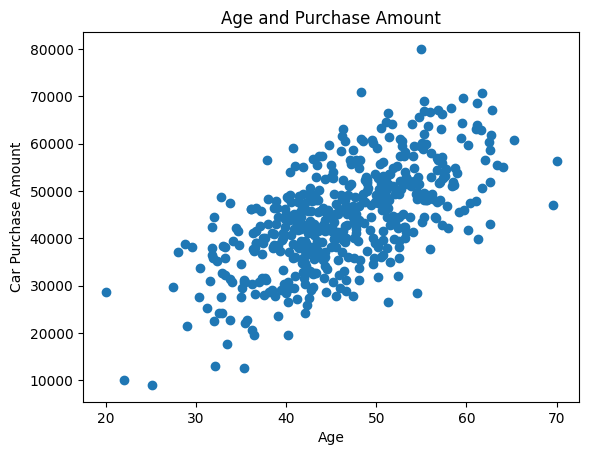

In [27]:
plt.scatter(data["age"],data["car purchase amount"])
plt.title("Age and Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Car Purchase Amount")
plt.show()

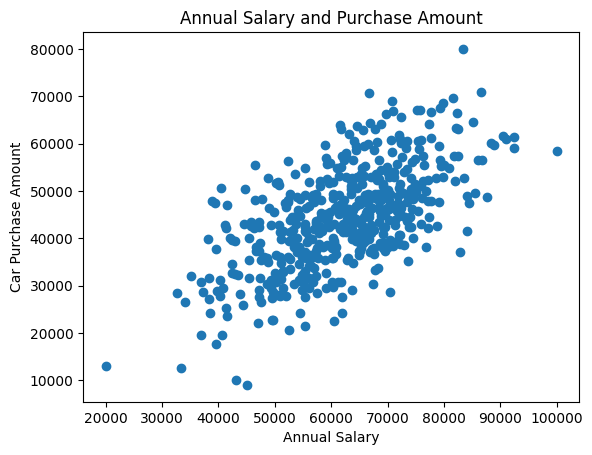

In [ ]:
F

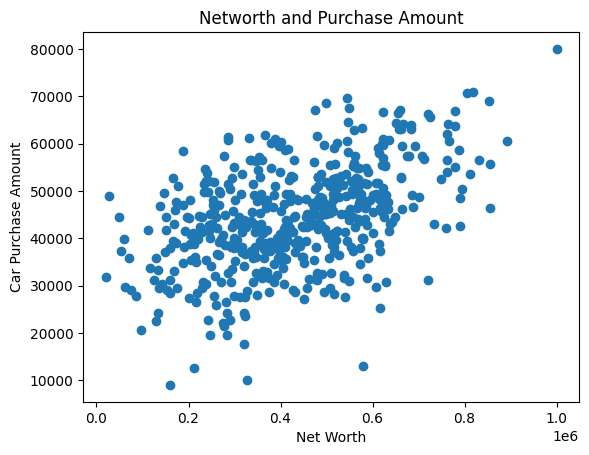

In [29]:
plt.scatter(data["net worth"],data["car purchase amount"])
plt.title("Networth and Purchase Amount")
plt.xlabel("Net Worth")
plt.ylabel("Car Purchase Amount")
plt.show()

In [31]:
data.head(2)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566


In [33]:
data["Gender2"] = data["gender"].apply(lambda x: "Female" if x == 1 else "Male")
data["Gender2"].value_counts()

Gender2
Female    253
Male      247
Name: count, dtype: int64

In [37]:
data.groupby("Gender2")["age"].min()

Gender2
Female    20.000000
Male      25.179893
Name: age, dtype: float64

In [38]:
data.groupby("Gender2")['net worth'].mean()

Gender2
Female    430037.639104
Male      432948.721130
Name: net worth, dtype: float64

Text(0.5, 1.0, 'Net Worth by Gender')

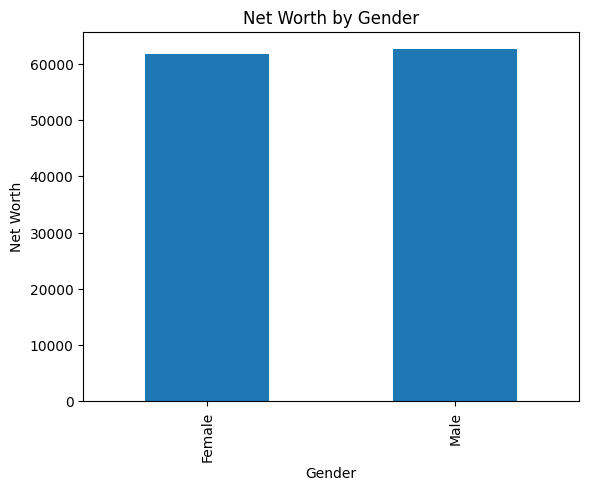

In [ ]:
data.groupby("Gender2")['annual Salary'].mean().plot(kind = "bar")
plt.xlabel("Gender")
plt.ylabel("Net Worth")
plt.title("Net Worth by Gender")

In [46]:
data["age"]

0      41.851720
1      40.870623
2      43.152897
3      58.271369
4      57.313749
         ...    
495    41.462515
496    37.642000
497    53.943497
498    59.160509
499    46.731152
Name: age, Length: 500, dtype: float64

In [50]:
def age_groups_creation(data):
    if data["age"] < 30:
        return "20- 30"
    elif data["age"] < 40:
        return "30- 40"
    elif data["age"] < 50:
        return "40- 50"
    elif data["age"] < 60:
        return "50 - 60"
    else:
        return "60 - 70"

In [52]:
data["Age Range"] = data.apply(age_groups_creation,axis = 1)

In [53]:
data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,Gender2,Age Range
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,Male,40- 50
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,Male,40- 50
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,Female,40- 50
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,Female,50 - 60
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,Female,50 - 60
...,...,...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,Male,40- 50
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,Female,30- 40
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,Female,50 - 60
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,Female,50 - 60


In [58]:
data["Age Range"].value_counts()

Age Range
40- 50     231
50 - 60    142
30- 40      96
60 - 70     23
20- 30       8
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram of Age')

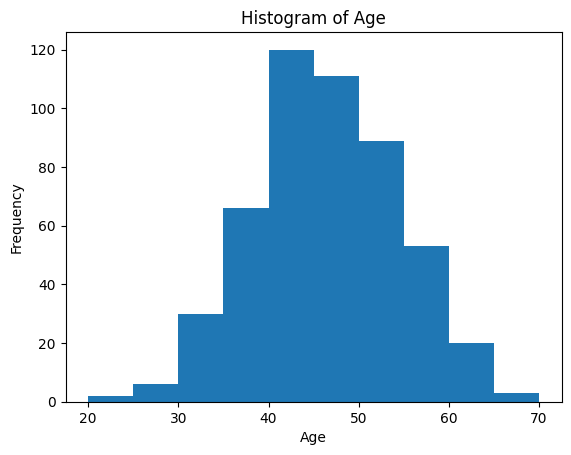

In [60]:
plt.hist(data["age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

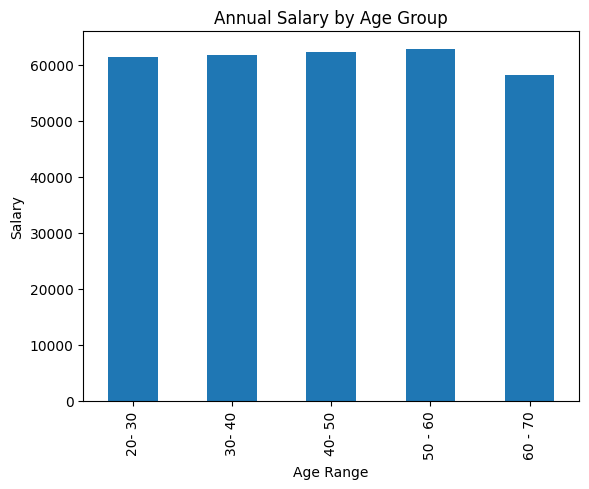

In [70]:
data.groupby("Age Range")["annual Salary"].mean().plot(kind = "bar")
plt.title("Annual Salary by Age Group")
plt.xlabel("Age Range")
plt.ylabel("Salary")
plt.show()

Text(0, 0.5, 'Amount')

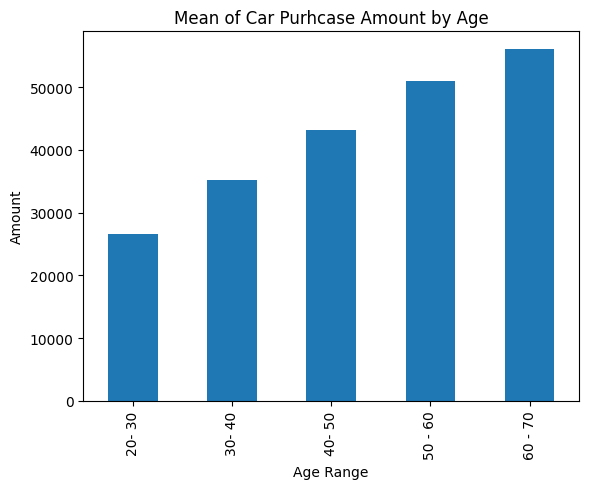

In [81]:
data.groupby("Age Range")["car purchase amount"].mean().plot(kind = "bar")
plt.title('Mean of Car Purhcase Amount by Age')
plt.ylabel("Amount")

In [86]:
data.groupby(["Age Range", "Gender2"])["car purchase amount"].mean()

Age Range  Gender2
20- 30     Female     27417.853146
           Male       25277.462433
30- 40     Female     34698.012126
           Male       36033.521977
40- 50     Female     42136.093969
           Male       44183.213731
50 - 60    Female     52224.305711
           Male       50086.066111
60 - 70    Female     59429.713077
           Male       53534.350440
Name: car purchase amount, dtype: float64

In [87]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,Gender2,Age Range
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,Male,40- 50
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,Male,40- 50
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,Female,40- 50
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,Female,50 - 60
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,Female,50 - 60


In [88]:
X = data.head()